# Dataset Simulation Test 

### Based off of Literature review and research into distributions for pet dogs in Southern US

#### Note:
- Dog-specific features use national distributions
- Environ features use Southeast US distributions

In [204]:
import numpy as np
import pandas as pd
import ast 
from matplotlib import pyplot as plt

In [205]:
import os
print(os.getcwd())

/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp


In [206]:
import os
os.getcwd()
# change directory to where you cloned Repo on your local machine
# you can then access our files there rather than needing to download each onto local machine
os.chdir("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp")

In [207]:
dogs_dataset = pd.read_csv("dogs_dataset.csv")
dogs_dataset.head()

# use for sampling breed.
# for each breed. this dataset is simulated but menat to represent real-world
# distributions

Breed  Age (Years)  Weight (kg)    Color  Gender
0      Airedale Terrier           13           35    White    Male
1  Jack Russell Terrier           10           43      Tan  Female
2        Dogo Argentino            2           16  Spotted  Female
3    Labrador Retriever            9           57  Bicolor    Male
4        French Bulldog           12           39  Spotted    Male

In [208]:
# get distribution for breeds (popularity in US = proportions)
breed_probs = dogs_dataset["Breed"].value_counts(normalize=True)

# View as percentages
breed_percentages = (breed_probs * 100).round(2)
# Print
print(breed_percentages.head())  # top 5 breeds

breed_categories = breed_probs.index.tolist()
breed_probabilities = breed_probs.values.tolist()

Breed
Rottweiler              3.93
French Bulldog          2.33
Pekingese               2.27
Pembroke Welsh Corgi    2.23
Doberman Pinscher       2.20
Name: proportion, dtype: float64


In [209]:
# summarize each breed's age, wt, gender, color distributions.
breed_params_df = dogs_dataset.groupby('Breed').agg({
    'Age (Years)': ['mean', 'std'],
    'Weight (kg)': ['mean', 'std'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Color': lambda x: x.value_counts(normalize=True).to_dict()
}).reset_index()

# need mu and sd to use normal distribution for each breed's age and wt to build sample population.
breed_params_df.columns = ['Breed', 'age_mu', 'age_sd', 'wt_mu', 'wt_sd', 'gender_probs', 'color_probs']
breed_params_df.head()

Breed    age_mu    age_sd      wt_mu      wt_sd  \
0     Airedale Terrier  8.218182  4.336285  31.818182  13.997475   
1                Akita  7.784314  3.874603  31.686275  14.360348   
2     Alaskan Malamute  6.981818  3.870548  34.636364  14.876484   
3  Australian Shepherd  7.823529  3.675355  33.352941  16.359491   
4              Basenji  7.551020  4.178622  31.938776  17.336628   

                                        gender_probs  \
0  {'Male': 0.5454545454545454, 'Female': 0.45454...   
1  {'Male': 0.5686274509803921, 'Female': 0.43137...   
2  {'Male': 0.5454545454545454, 'Female': 0.45454...   
3  {'Male': 0.5882352941176471, 'Female': 0.41176...   
4  {'Male': 0.5102040816326531, 'Female': 0.48979...   

                                         color_probs  
0  {'Tricolor': 0.12727272727272726, 'Bicolor': 0...  
1  {'Merle': 0.11764705882352941, 'Black and Whit...  
2  {'Blue': 0.10909090909090909, 'Merle': 0.10909...  
3  {'Brown': 0.11764705882352941, 'Sable': 0.0980...  
4  {'Cream': 0.12244897959183673, 'Brindle': 0.12...

#### ***TODO***: get breed specific max and mins. so we can ensure sampled values are within reasonable range. 
- trim off the S at end of each breed (plural) from breed traits dataset and convert Retrievers (Golden) to Golden Retriever, etc to match with our sampled breed names in synthetic dataset

In [210]:
breed_schema = {
    "Breed": {
        "type": "categorical",
        "categories": breed_categories,
        "probs": breed_probabilities
    }
}
len(breed_schema["Breed"]["categories"])
# only 53 breeds here
sum(breed_schema["Breed"]["probs"])
display(breed_schema["Breed"]["categories"])

['Rottweiler',
 'French Bulldog',
 'Pekingese',
 'Pembroke Welsh Corgi',
 'Doberman Pinscher',
 'Weimaraner',
 'Pug',
 'Bichon Frise',
 'Vizsla',
 'Cavalier King Charles Spaniel',
 'Chinese Shar-Pei',
 'Poodle',
 'Whippet',
 'Dachshund',
 'Cocker Spaniel',
 'Bloodhound',
 'Border Collie',
 'Lhasa Apso',
 'Samoyed',
 'Bernese Mountain Dog',
 'Alaskan Malamute',
 'Miniature Schnauzer',
 'Jack Russell Terrier',
 'Bulldog',
 'Airedale Terrier',
 'Dogo Argentino',
 'Irish Setter',
 'Bull Terrier',
 'Havanese',
 'Beagle',
 'Great Dane',
 'Saint Bernard',
 'Boston Terrier',
 'German Shepherd',
 'Siberian Husky',
 'Yorkshire Terrier',
 'Labrador Retriever',
 'Boxer',
 'Chesapeake Bay Retriever',
 'Maltese',
 'Shih Tzu',
 'Australian Shepherd',
 'Akita',
 'Shetland Sheepdog',
 'Basenji',
 'Papillon',
 'West Highland White Terrier',
 'Chihuahua',
 'Pomeranian',
 'Schnauzer',
 'Shiba Inu',
 'Belgian Malinois',
 'Golden Retriever']

### Using sample dog pop (aggregate by breed to find params) from Kaggle

In [211]:
N = 10000 # can change sample size later
sampled_breeds = np.random.choice(
        breed_schema["Breed"]["categories"],
        size=N,
        p=breed_schema["Breed"]["probs"]
    )
#display(breeds)

synthetic_rows = []

for breed in sampled_breeds:
    # lookup parameters for that breed
    params = breed_params_df.loc[breed_params_df["Breed"] == breed].iloc[0]

    # sample continuous features
    age = np.random.normal(params["age_mu"], params["age_sd"])
    weight = np.random.normal(params["wt_mu"], params["wt_sd"])

    # handle categorical features
    gender_probs = params["gender_probs"]
    if isinstance(gender_probs, str):
        gender_probs = ast.literal_eval(gender_probs)
    gender = np.random.choice(list(gender_probs.keys()), p=list(gender_probs.values()))

    color_probs = params["color_probs"]
    if isinstance(color_probs, str):
        color_probs = ast.literal_eval(color_probs)
    color = np.random.choice(list(color_probs.keys()), p=list(color_probs.values()))

    synthetic_rows.append({
        "Breed": breed,
        "Age": round(age, 1),
        "Weight": round(weight, 1),
        "Gender": gender,
        "Color": color
    })
synthetic_dogs_df = pd.DataFrame(synthetic_rows)
display(synthetic_dogs_df.head(30))

Breed   Age  Weight  Gender            Color
0          Yorkshire Terrier   9.6    25.3    Male         Tricolor
1                     Poodle   4.3    43.6  Female             Gray
2             French Bulldog   3.5    33.3    Male            Cream
3       Pembroke Welsh Corgi   6.4    49.6  Female            Cream
4                 Weimaraner   3.0    59.7    Male            Brown
5           Airedale Terrier  12.1    -0.3    Male              Tan
6             French Bulldog   7.2    18.6    Male          Spotted
7         Labrador Retriever   4.0    52.5  Female              Red
8                     Vizsla  14.0    32.3    Male             Gray
9                 Rottweiler   2.1    24.7  Female          Brindle
10                Rottweiler  10.3    36.0    Male             Blue
11  Chesapeake Bay Retriever   5.7    37.7  Female    Black and Tan
12          Alaskan Malamute   2.5    28.4    Male         Tricolor
13      Bernese Mountain Dog   8.4    33.5  Female  Black and White
14      Pembroke Welsh Corgi   8.1    26.7    Male  Black and White
15                Bloodhound  13.6    11.2  Female    Black and Tan
16                   Bulldog  -1.2    24.3  Female          Brindle
17       Miniature Schnauzer   4.3    41.6    Male            Brown
18              Bichon Frise  11.3    34.1  Female            Black
19                 Pekingese   3.4    55.1  Female            Sable
20       Australian Shepherd   7.9     7.8    Male  Black and White
21           German Shepherd  13.8    44.1  Female             Blue
22                    Poodle  13.8    41.7  Female              Tan
23                Pomeranian   5.7    24.8    Male    Black and Tan
24                 Shiba Inu   8.1    23.2    Male             Blue
25  Chesapeake Bay Retriever   9.3    48.9    Male              Red
26            Dogo Argentino   6.5    33.7  Female              Tan
27  Chesapeake Bay Retriever  10.4    -8.6    Male         Tricolor
28       Miniature Schnauzer  15.0    42.7    Male         Tricolor
29                   Maltese   6.1    29.8  Female             Blue

### Now map to coat length, coat type, and playfulness/energy level*

*From other Kaggle dataset(s) - breed_traits.csv

In [212]:
breed_traits = pd.read_csv("breed_traits.csv")
breed_traits.columns
#display(breed_traits)
trait_desc = pd.read_csv("trait_description.csv")
display(trait_desc)

# explains scale of each trait (scale of 1-5 and what 1 and 5 represent)
# for each dog, have their score in each of these columns. (195 breeds)
# Let's use for Coat Length, Coat Type, Energy Level, Playfulness Level

Trait                     Trait_1  \
0     Affectionate With Family                 Independent   
1     Good With Young Children             Not Recommended   
2         Good With Other Dogs             Not Recommended   
3               Shedding Level                 No Shedding   
4      Coat Grooming Frequency                     Monthly   
5               Drooling Level        Less Likely to Drool   
6                    Coat Type                           -   
7                  Coat Length                           -   
8        Openness To Strangers                    Reserved   
9            Playfulness Level  Only When You Want To Play   
10  Watchdog/Protective Nature        What's Mine Is Yours   
11          Adaptability Level           Lives For Routine   
12          Trainability Level                 Self-Willed   
13                Energy Level                Couch Potato   
14               Barking Level               Only To Alert   
15    Mental Stimulation Needs             Happy to Lounge   

                       Trait_5  \
0                  Lovey-Dovey   
1           Good With Children   
2         Good With Other Dogs   
3              Hair Everywhere   
4                        Daily   
5          Always Have a Towel   
6                            -   
7                            -   
8   Everyone Is My Best Friend   
9                     Non-Stop   
10                    Vigilant   
11            Highly Adaptable   
12             Eager to Please   
13                 High Energy   
14                  Very Vocal   
15     Needs a Job or Activity   

                                          Description  
0   How affectionate a breed is likely to be with ...  
1   A breed's level of tolerance and patience with...  
2   How generally friendly a breed is towards othe...  
3   How much fur and hair you can expect the breed...  
4   How frequently a breed requires bathing, brush...  
5   How drool-prone a breed tends to be. If you're...  
6   Canine coats come in many different types, dep...  
7   How long the breed's coat is expected to be. S...  
8   How welcoming a breed is likely to be towards ...  
9   How enthusiastic about play a breed is likely ...  
10  A breed's tendency to alert you that strangers...  
11  How easily a breed handles change. This can in...  
12  How easy it will be to train your dog, and how...  
13  The amount of exercise and mental stimulation ...  
14  How often this breed vocalizes, whether it's w...  
15  How much mental stimulation a breed needs to s...

In [213]:
breed_traits["Coat Length"].value_counts()


Coat Length
Short           86
Medium          79
Long            29
Plott Hounds     1
Name: count, dtype: int64

In [214]:
breed_traits["Coat Type"].value_counts()

Coat Type
Double          66
Smooth          66
Wiry            30
Silky            9
Curly            7
Wavy             6
Corded           4
Hairless         3
Rough            3
Plott Hounds     1
Name: count, dtype: int64

In [215]:
sorted_breeds = sorted(breed_traits["Breed"].unique())
pd.set_option("display.max_rows", None)  # show all
display(sorted_breeds)


['Affenpinschers',
 'Afghan\xa0Hounds',
 'Airedale\xa0Terriers',
 'Akitas',
 'Alaskan\xa0Malamutes',
 'American\xa0English\xa0Coonhounds',
 'American\xa0Eskimo\xa0Dogs',
 'American\xa0Foxhounds',
 'American\xa0Hairless\xa0Terriers',
 'American\xa0Staffordshire\xa0Terriers',
 'Anatolian\xa0Shepherd\xa0Dogs',
 'Australian\xa0Cattle\xa0Dogs',
 'Australian\xa0Shepherds',
 'Australian\xa0Terriers',
 'Azawakhs',
 'Barbets',
 'Basenjis',
 'Basset\xa0Hounds',
 'Beagles',
 'Bearded\xa0Collies',
 'Beaucerons',
 'Bedlington\xa0Terriers',
 'Belgian\xa0Malinois',
 'Belgian\xa0Sheepdogs',
 'Belgian\xa0Tervuren',
 'Bergamasco\xa0Sheepdogs',
 'Berger\xa0Picards',
 'Bernese\xa0Mountain\xa0Dogs',
 'Bichons\xa0Frises',
 'Black\xa0Russian\xa0Terriers',
 'Black\xa0and\xa0Tan\xa0Coonhounds',
 'Bloodhounds',
 'Bluetick\xa0Coonhounds',
 'Boerboels',
 'Border\xa0Collies',
 'Border\xa0Terriers',
 'Borzois',
 'Boston\xa0Terriers',
 'Bouviers\xa0des\xa0Flandres',
 'Boxers',
 'Briards',
 'Brittanys',
 'Brussels\xa

In [216]:
# Clean breed names in both datasets
def clean_breed_names(series):
    return (series
            .str.replace('\xa0', ' ', regex=False)   # replace non-breaking space
            .str.strip()                              # remove leading/trailing spaces
           )

breed_traits["Breed"] = clean_breed_names(breed_traits["Breed"])
dogs_dataset["Breed"] = clean_breed_names(dogs_dataset["Breed"])

breed_traits["Breed"].value_counts()

Breed
Retrievers (Labrador)                    1
Swedish Vallhunds                        1
Bearded Collies                          1
Black Russian Terriers                   1
Black and Tan Coonhounds                 1
Spaniels (Welsh Springer)                1
American Hairless Terriers               1
Norfolk Terriers                         1
Xoloitzcuintli                           1
Manchester Terriers                      1
Kerry Blue Terriers                      1
Australian Terriers                      1
Spaniels (Clumber)                       1
Lakeland Terriers                        1
Bluetick Coonhounds                      1
English Toy Spaniels                     1
German Pinschers                         1
Tibetan Mastiffs                         1
Bedlington Terriers                      1
Greyhounds                               1
Pulik                                    1
Salukis                                  1
Barbets                                  1
Fox T

In [217]:
# find all rows that have parentheses
breed_traits_with_parens = breed_traits[breed_traits['Breed'].str.contains(r'\(|\)', na=False)]
print(breed_traits_with_parens)

#.str.replace(r'[^a-z\s]', '', regex=True) # remove punctuation if needed

                                     Breed  Affectionate With Family  \
0                    Retrievers (Labrador)                         5   
3                      Retrievers (Golden)                         5   
8            Pointers (German Shorthaired)                         5   
25             Spaniels (English Springer)                         5   
29                       Spaniels (Cocker)                         4   
46               Spaniels (English Cocker)                         5   
49             Retrievers (Chesapeake Bay)                         4   
59            Pointers (German Wirehaired)                         5   
74                         Setters (Irish)                         5   
86                       Spaniels (Boykin)                         3   
89   Retrievers (Nova Scotia Duck Tolling)                         5   
100                      Setters (English)                         5   
101               Retrievers (Flat-Coated)                      

In [218]:
# fixing paretheses 
conditions = [
    (breed_traits['Breed'] == "Retrievers (Golden)"),
    (breed_traits['Breed'] == "Retrievers (Labrador)"),
    (breed_traits['Breed'] == "Retrievers (Chesapeake Bay)"),
    (breed_traits['Breed'] == 'Spaniels (Cocker)')
]
# TODO: add more cases!!

choices = ['Golden Retrievers', 'Labrador Retrievers', 'Chesapeake Bay Retrievers', 'Cocker Spaniels']

breed_traits['Breed_clean'] = np.select(conditions, choices, default=breed_traits['Breed'])

# Filter rows where 'Breed_clean' does not contain '(' or ')'
no_parentheses = breed_traits[~breed_traits["Breed_clean"].str.contains(r'\(|\)', na=False)]
# remove duplicates
no_parentheses = no_parentheses.drop_duplicates(subset=["Breed_clean"])
no_parentheses["Breed_singular"] =  no_parentheses['Breed_clean'].str[:-1]
#breed_traits["Breed_singular"]

In [219]:
print(len(no_parentheses))
no_parentheses["Breed_singular"].value_counts()

175


Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [220]:
no_parentheses["Breed_singular"].value_counts()

Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [221]:
no_parentheses.drop(columns=["Breed", "Breed_clean"], inplace=True)
no_parentheses.rename(columns={"Breed_singular": "Breed"}, inplace=True)
no_parentheses.head(5)

Affectionate With Family  Good With Young Children  Good With Other Dogs  \
0                         5                         5                     5   
1                         5                         5                     4   
2                         5                         5                     3   
3                         5                         5                     5   
4                         4                         3                     3   

   Shedding Level  Coat Grooming Frequency  Drooling Level Coat Type  \
0               4                        2               2    Double   
1               3                        1               3    Smooth   
2               4                        2               2    Double   
3               4                        2               2    Double   
4               3                        3               3    Smooth   

  Coat Length  Openness To Strangers  Playfulness Level  \
0       Short                      5                  5   
1       Short                      5                  5   
2      Medium                      3                  4   
3      Medium                      5                  4   
4       Short                      4                  4   

   Watchdog/Protective Nature  Adaptability Level  Trainability Level  \
0                           3                   5                   5   
1                           3                   5                   4   
2                           5                   5                   5   
3                           3                   5                   5   
4                           3                   3                   4   

   Energy Level  Barking Level  Mental Stimulation Needs                Breed  
0             5              3                         4   Labrador Retriever  
1             3              1                         3       French Bulldog  
2             5              3                         5  German Shepherd Dog  
3             3              1                         4     Golden Retriever  
4             3              2                         3              Bulldog

In [222]:
breed_traits = no_parentheses 
#breed_traits['is_brachycephalic'] = breed_traits['Breed'].isin(brachycephalic_breeds).astype(int)

breed_traits_breednames = set(breed_traits["Breed"])
dogs_breeds = set(dogs_dataset["Breed"])

matches = breed_traits_breednames & dogs_breeds
print(f"Exact matches after cleaning: {len(matches)}")

# Find close matches for non-matching breeds
from difflib import get_close_matches
non_matching_breeds = breed_traits_breednames - matches   
close_matches = {breed: get_close_matches(breed, dogs_breeds, n=1, cutoff=0.8) for breed in non_matching_breeds}
# Filter out breeds with no close matches
close_matches = {k: v[0] for k, v in close_matches.items() if v}
print("Close matches found:")
for k, v in close_matches.items():
    print(f"{k} -> {v}")

Exact matches after cleaning: 39
Close matches found:
Russell Terrier -> Jack Russell Terrier
Bichons Frise -> Bichon Frise
Belgian Malinoi -> Belgian Malinois
German Pinscher -> Doberman Pinscher
Havanes -> Havanese
Pekinges -> Pekingese
Icelandic Sheepdog -> Shetland Sheepdog
Chinese Shar-Pe -> Chinese Shar-Pei
Shih Tz -> Shih Tzu
Siberian Huskie -> Siberian Husky
Bearded Collie -> Border Collie
Parson Russell Terrier -> Jack Russell Terrier
Maltes -> Maltese
Shiba In -> Shiba Inu
German Shepherd Dog -> German Shepherd
St. Bernard -> Saint Bernard


In [223]:
# Manually verify and create a mapping dictionary
mapping_dict = {
    "Bearded Collie": "Border Collie",
    "Siberian Huskie": "Siberian Husky",
    "Pekinges": "Pekingese",
    "Havanese": "Havanese",
    "German Shepard Dog": "German Shepherd",
    "Maltes": "Maltese",
    "Shiba Inu": "Shiba Inu",
    "St. Bernard": "Saint Bernard",
    "German Pinscher": "Doberman Pinscher",
    "Russell Terrier": "Jack Russell Terrier",
    "Icelandic Sheepdog": "Shetland Sheepdog",
    "Chinese Shar-Pe": "Chinese Shar-Pei",
    "Havanes": "Havanese",
    "Kuvaszo": "Kuvasz",
    "Lowche": "Lowchen",
    "Belgian Malinois": "Belgian Malinois"
    # Add more mappings as needed - can do later on.
}

# Apply the mapping to the breed_traits DataFrame
breed_traits["Breed"] = breed_traits["Breed"].replace(mapping_dict)

# Recalculate matches after applying the mapping
all_breeds_from_traits = set(breed_traits["Breed"])
matches = all_breeds_from_traits & dogs_breeds
print(f"Exact matches after mapping: {len(matches)}")

Exact matches after mapping: 46


In [224]:
# Add brachycephalic flag
brachycephalic_breeds = [
    'French Bulldog', 'Bulldog', 'Pug', 'Boxer', 'Boston Terrier',
    'Cavalier King Charles Spaniel', 'Shih Tzu', 'Pekingese',
    'Brussels Griffon', 'Bullmastiff', 'Bull Terrier',
    'Miniature Bull Terrier', 'Staffordshire Bull Terrier',
    'American Staffordshire Terrier', 'Dogues de Bordeaux',
    'Neapolitan Mastiff', 'English Toy Spaniel', 'Japanese Chin'
]

breed_traits['is_brachycephalic'] = breed_traits['Breed'].isin(brachycephalic_breeds).astype(int)

In [225]:

breed_traits.head()

Affectionate With Family  Good With Young Children  Good With Other Dogs  \
0                         5                         5                     5   
1                         5                         5                     4   
2                         5                         5                     3   
3                         5                         5                     5   
4                         4                         3                     3   

   Shedding Level  Coat Grooming Frequency  Drooling Level Coat Type  \
0               4                        2               2    Double   
1               3                        1               3    Smooth   
2               4                        2               2    Double   
3               4                        2               2    Double   
4               3                        3               3    Smooth   

  Coat Length  Openness To Strangers  Playfulness Level  \
0       Short                      5                  5   
1       Short                      5                  5   
2      Medium                      3                  4   
3      Medium                      5                  4   
4       Short                      4                  4   

   Watchdog/Protective Nature  Adaptability Level  Trainability Level  \
0                           3                   5                   5   
1                           3                   5                   4   
2                           5                   5                   5   
3                           3                   5                   5   
4                           3                   3                   4   

   Energy Level  Barking Level  Mental Stimulation Needs                Breed  \
0             5              3                         4   Labrador Retriever   
1             3              1                         3       French Bulldog   
2             5              3                         5  German Shepherd Dog   
3             3              1                         4     Golden Retriever   
4             3              2                         3              Bulldog   

   is_brachycephalic  
0                  0  
1                  1  
2                  0  
3                  0  
4                  1

In [226]:
breed_traits["is_brachycephalic"].value_counts()

is_brachycephalic
0    160
1     15
Name: count, dtype: int64

#### ***TODO*** Examining breed names so we can match the between data sources
- Need to fix mapping of dog breeds (standardize names so we can join on breeds between datasets)
- Breed is plural in one dataset
- some breeds need to be generalized (should hit 53)

#### Wait until breed names standardized to join them!!

In [227]:

check = pd.merge(synthetic_dogs_df, breed_traits, on="Breed", how="left")
notnull = check[check["Coat Length"].notna()]
len(notnull)


9366

In [228]:
check.columns


Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Coat Type', 'Coat Length',
       'Openness To Strangers', 'Playfulness Level',
       'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'is_brachycephalic'],
      dtype='object')

In [229]:
# not null:
print("Num breeds represented in synthetic dataset that have trait data:")
print(len(notnull["Breed"].unique()))
notnull["Breed"].value_counts()
# only 3 breeds actually matched exactly

Num breeds represented in synthetic dataset that have trait data:
46


Breed
Rottweiler                       423
Doberman Pinscher                406
Border Collie                    372
Shetland Sheepdog                356
Cavalier King Charles Spaniel    243
Weimaraner                       233
Pekingese                        228
Pug                              222
Pembroke Welsh Corgi             221
Poodle                           208
Bull Terrier                     208
Airedale Terrier                 208
Saint Bernard                    207
Vizsla                           201
French Bulldog                   200
Beagle                           200
Dachshund                        198
Chinese Shar-Pei                 196
Bernese Mountain Dog             195
Lhasa Apso                       192
Miniature Schnauzer              191
Havanese                         189
Jack Russell Terrier             188
Boxer                            186
Great Dane                       183
West Highland White Terrier      181
Chesapeake Bay Retriever        

### Sample for time of year (season) so we can get different environ distributions

In [230]:
notnull.head(10)

Breed   Age  Weight  Gender     Color  \
0     Yorkshire Terrier   9.6    25.3    Male  Tricolor   
1                Poodle   4.3    43.6  Female      Gray   
2        French Bulldog   3.5    33.3    Male     Cream   
3  Pembroke Welsh Corgi   6.4    49.6  Female     Cream   
4            Weimaraner   3.0    59.7    Male     Brown   
5      Airedale Terrier  12.1    -0.3    Male       Tan   
6        French Bulldog   7.2    18.6    Male   Spotted   
7    Labrador Retriever   4.0    52.5  Female       Red   
8                Vizsla  14.0    32.3    Male      Gray   
9            Rottweiler   2.1    24.7  Female   Brindle   

   Affectionate With Family  Good With Young Children  Good With Other Dogs  \
0                       5.0                       5.0                   3.0   
1                       5.0                       5.0                   3.0   
2                       5.0                       5.0                   4.0   
3                       5.0                       3.0                   4.0   
4                       5.0                       5.0                   3.0   
5                       3.0                       3.0                   3.0   
6                       5.0                       5.0                   4.0   
7                       5.0                       5.0                   5.0   
8                       5.0                       5.0                   4.0   
9                       5.0                       3.0                   3.0   

   Shedding Level  Coat Grooming Frequency  ...  Coat Length  \
0             1.0                      5.0  ...         Long   
1             1.0                      4.0  ...         Long   
2             3.0                      1.0  ...        Short   
3             4.0                      2.0  ...        Short   
4             3.0                      2.0  ...        Short   
5             1.0                      3.0  ...        Short   
6             3.0                      1.0  ...        Short   
7             4.0                      2.0  ...        Short   
8             3.0                      2.0  ...        Short   
9             3.0                      1.0  ...        Short   

  Openness To Strangers Playfulness Level  Watchdog/Protective Nature  \
0                   5.0               4.0                         5.0   
1                   5.0               5.0                         5.0   
2                   5.0               5.0                         3.0   
3                   4.0               4.0                         5.0   
4                   3.0               5.0                         5.0   
5                   3.0               3.0                         5.0   
6                   5.0               5.0                         3.0   
7                   5.0               5.0                         3.0   
8                   4.0               5.0                         3.0   
9                   3.0               4.0                         5.0   

   Adaptability Level  Trainability Level  Energy Level  Barking Level  \
0                 5.0                 4.0           4.0            4.0   
1                 4.0                 5.0           4.0            4.0   
2                 5.0                 4.0           3.0            1.0   
3                 4.0                 4.0           4.0            4.0   
4                 4.0                 5.0           5.0            3.0   
5                 3.0                 3.0           3.0            3.0   
6                 5.0                 4.0           3.0            1.0   
7                 5.0                 5.0           5.0            3.0   
8                 5.0                 5.0           5.0            3.0   
9                 4.0                 5.0           3.0            1.0   

   Mental Stimulation Needs  is_brachycephalic  
0                       4.0                0.0  
1                       5.0                0.0  
2                       3.0

In [231]:
# adding starting point identifer for tutorial 

In [232]:
from_kaggle_sets = notnull[["Breed", "Age", "Weight", "Gender", "Color", "Coat Length", "Coat Type", "Energy Level", "Playfulness Level", "is_brachycephalic"]]
from_kaggle_sets.head(10)

Breed   Age  Weight  Gender     Color Coat Length Coat Type  \
0     Yorkshire Terrier   9.6    25.3    Male  Tricolor        Long     Silky   
1                Poodle   4.3    43.6  Female      Gray        Long     Curly   
2        French Bulldog   3.5    33.3    Male     Cream       Short    Smooth   
3  Pembroke Welsh Corgi   6.4    49.6  Female     Cream       Short    Double   
4            Weimaraner   3.0    59.7    Male     Brown       Short    Smooth   
5      Airedale Terrier  12.1    -0.3    Male       Tan       Short      Wiry   
6        French Bulldog   7.2    18.6    Male   Spotted       Short    Smooth   
7    Labrador Retriever   4.0    52.5  Female       Red       Short    Double   
8                Vizsla  14.0    32.3    Male      Gray       Short    Smooth   
9            Rottweiler   2.1    24.7  Female   Brindle       Short    Smooth   

   Energy Level  Playfulness Level  is_brachycephalic  
0           4.0                4.0                0.0  
1           4.0                5.0                0.0  
2           3.0                5.0                1.0  
3           4.0                4.0                0.0  
4           5.0                5.0                0.0  
5           3.0                3.0                0.0  
6           3.0                5.0                1.0  
7           5.0                5.0                0.0  
8           5.0                5.0                0.0  
9           3.0                4.0                0.0

In [233]:
df = from_kaggle_sets.copy()
age_factor = (10 - df['Age']).clip(0) / 10      # older dogs slightly lower energy/playfulness
weight_factor = (50 - df['Weight']).clip(0) / 50  # heavier dogs slightly lower playfulness

# Add random Gaussian noise
energy_noise = np.random.normal(0, 0.8, size=len(df))
playfulness_noise = np.random.normal(0, 0.8, size=len(df))

# Compute noisy energy/playfulness
df['Energy Level Noisy'] = (df['Energy Level'] * 0.7 +
                            df['Energy Level'] * age_factor * 0.2 +
                            df['Energy Level'] * weight_factor * 0.1 +
                            energy_noise)

df['Playfulness Level Noisy'] = (df['Playfulness Level'] * 0.7 +
                                 df['Playfulness Level'] * age_factor * 0.2 +
                                 df['Playfulness Level'] * weight_factor * 0.1 +
                                 playfulness_noise)

# Clip to reasonable bounds (e.g., 1-10)
df['Energy Level Noisy'] = df['Energy Level Noisy'].clip(1, 10)
df['Playfulness Level Noisy'] = df['Playfulness Level Noisy'].clip(1, 10)

df.head(10)
df.drop(columns=["Energy Level", "Playfulness Level"], inplace=True)
from_kaggle_sets = df

In [234]:
np.shape(from_kaggle_sets)

(9366, 10)

In [235]:
# weight in kilograms 

conditions = [
    (from_kaggle_sets['Weight'] < 4.5),
    (from_kaggle_sets['Weight'] < 11),
    (from_kaggle_sets['Weight'] < 25),
    (from_kaggle_sets['Weight'] < 45), 
    (from_kaggle_sets['Weight'] >= 45)
]
choices = ['Toy', 'Small', 'Medium', 'Large', 'Giant']

from_kaggle_sets["size_category"] =  np.select(conditions, choices, default='Unknown')
from_kaggle_sets["size_category"].value_counts()

size_category
Large     4363
Medium    2222
Giant     1919
Small      468
Toy        394
Name: count, dtype: int64

In [236]:
display(from_kaggle_sets.head(100))


Breed   Age  Weight  Gender            Color  \
0                Yorkshire Terrier   9.6    25.3    Male         Tricolor   
1                           Poodle   4.3    43.6  Female             Gray   
2                   French Bulldog   3.5    33.3    Male            Cream   
3             Pembroke Welsh Corgi   6.4    49.6  Female            Cream   
4                       Weimaraner   3.0    59.7    Male            Brown   
5                 Airedale Terrier  12.1    -0.3    Male              Tan   
6                   French Bulldog   7.2    18.6    Male          Spotted   
7               Labrador Retriever   4.0    52.5  Female              Red   
8                           Vizsla  14.0    32.3    Male             Gray   
9                       Rottweiler   2.1    24.7  Female          Brindle   
10                      Rottweiler  10.3    36.0    Male             Blue   
11        Chesapeake Bay Retriever   5.7    37.7  Female    Black and Tan   
12                Alaskan Malamute   2.5    28.4    Male         Tricolor   
13            Bernese Mountain Dog   8.4    33.5  Female  Black and White   
14            Pembroke Welsh Corgi   8.1    26.7    Male  Black and White   
15                      Bloodhound  13.6    11.2  Female    Black and Tan   
16                         Bulldog  -1.2    24.3  Female          Brindle   
17             Miniature Schnauzer   4.3    41.6    Male            Brown   
19                       Pekingese   3.4    55.1  Female            Sable   
20             Australian Shepherd   7.9     7.8    Male  Black and White   
22                          Poodle  13.8    41.7  Female              Tan   
23                      Pomeranian   5.7    24.8    Male    Black and Tan   
25        Chesapeake Bay Retriever   9.3    48.9    Male              Red   
26                  Dogo Argentino   6.5    33.7  Female              Tan   
27        Chesapeake Bay Retriever  10.4    -8.6    Male         Tricolor   
28             Miniature Schnauzer  15.0    42.7    Male         Tricolor   
29                         Maltese   6.1    29.8  Female             Blue   
30                          Beagle  11.3    30.6    Male    Black and Tan   
31                         Bulldog   5.1    66.8  Female          Bicolor   
32                          Poodle  12.7    50.8  Female  Black and White   
33               Shetland Sheepdog   4.1    15.3    Male              Tan   
34               Shetland Sheepdog   4.1    15.3    Male              Tan   
35                           Akita   8.9    60.9    Male            Merle   
36                         Basenji  10.7    35.1  Female  Black and White   
37                         Samoyed  10.3    31.5  Female          Spotted   
38                          Poodle   6.6    67.9  Female             Gray   
39                  Siberian Husky   5.8    20.8  Female            Brown   
40                Golden Retriever   8.3    42.2    Male              Red   
41                  French Bulldog  15.1    26.7  Female            Brown   
42                      Weimaraner   6.7    35.6    Male          Bicolor   
43                      Bloodhound   6.4    44.1  Female  Black and White   
44                      Pomeranian   6.3    42.0    Male          Brindle   
45                         Maltese  13.1    49.5    Male            Merle   
46                Airedale Terrier  13.0    24.6    Male            White   
48                          Beagle  13.4    49.1  Female          Bicolor   
49                          Beagle   9.4    33.8    Male              Red   
50                          Poodle   2.1    18.3    Male            Black   
51                          Poodle  12.4    28.0    Male             Gray   
52                       Chihuahua  10.5    36.2    Male            White   
53   Cavalier King Charles Spaniel   1.8    20.5    Male             Gray   
54                      Rottweiler   3.1    40.3    Male            White   
55                  Cocke

#### ***TODO*** Neutered/Spayed:

In [237]:
N_nonnull = len(notnull)

In [238]:
from scipy.stats import bernoulli
p = 0.75
spayed_samples = bernoulli.rvs(p, size=N_nonnull)
from_kaggle_sets["Spayed/Neutered"] = spayed_samples

In [239]:
from_kaggle_sets["Spayed/Neutered"].value_counts()

Spayed/Neutered
1    7018
0    2348
Name: count, dtype: int64

In [240]:
indoor_outdoor = np.random.choice(["Indoor_Now", "Outdoor_Now"], size=N_nonnull, p=[0.8,0.2])
season = np.random.choice(["Spring", "Summer", "Fall", "Winter"], size=N_nonnull, p=[0.25,0.25,0.25,0.25])
# can reweight samples to pull from mostly warm months eventually
from_kaggle_sets["Indoor/Outdoor"] = indoor_outdoor
from_kaggle_sets["Season"] = season

#### Sun Exposure & Wind Cooling

In [241]:

# Generate multiple samples from the normal distribution
import numpy as np

sun_exposure_samples = []
wind_cool_samples = []
this_sun_exposure = 0
this_wind_cool = 0
# Create a default random number generator (recommended for new code)
rng = np.random.default_rng()
for index, row in from_kaggle_sets.iterrows():
    this_season = row["Season"]  # Access the Season column value
    this_indoor_outdoor = row["Indoor/Outdoor"]  # Access the Indoor_Outdoor column value
    if this_indoor_outdoor == "Indoor_Now":  # if dog is indoors
        this_sun_exposure = 0
        this_wind_cool = 0
    else:
        if this_season == "Winter":
            sun_mu, sun_sd = 1.5, 0.3
            wind_mu, wind_sd = -0.4, 0.3
        elif this_season == "Spring":
            sun_mu, sun_sd = 2.3, 0.4
            wind_mu, wind_sd = -0.6, 0.4
        elif this_season == "Summer":
            sun_mu, sun_sd = 2.8, 0.4
            wind_mu, wind_sd = -0.4, 0.3
        elif this_season == "Fall":
            sun_mu, sun_sd = 1.7, 0.4
            wind_mu, wind_sd = -0.5, 0.3
        this_sun_exposure = np.random.normal(sun_mu, sun_sd)
        this_wind_cool = np.random.normal(wind_mu, wind_sd)
    sun_exposure_samples.append(this_sun_exposure)
    wind_cool_samples.append(this_wind_cool)

    
print(len(sun_exposure_samples))
#print(sun_exposure_samples)

print(len(wind_cool_samples))
#print(wind_cool_samples)

from_kaggle_sets["Sun Exposure"] = sun_exposure_samples
from_kaggle_sets["Wind Cooling Effect"] = wind_cool_samples
from_kaggle_sets["Sun Exposure"] = from_kaggle_sets["Sun Exposure"] * 1.4  # 1.2–1.5 works


9366
9366


In [242]:
from_kaggle_sets.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level Noisy', 'Playfulness Level Noisy',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect'],
      dtype='object')

In [243]:
display(from_kaggle_sets[:10])

Breed   Age  Weight  Gender     Color Coat Length Coat Type  \
0     Yorkshire Terrier   9.6    25.3    Male  Tricolor        Long     Silky   
1                Poodle   4.3    43.6  Female      Gray        Long     Curly   
2        French Bulldog   3.5    33.3    Male     Cream       Short    Smooth   
3  Pembroke Welsh Corgi   6.4    49.6  Female     Cream       Short    Double   
4            Weimaraner   3.0    59.7    Male     Brown       Short    Smooth   
5      Airedale Terrier  12.1    -0.3    Male       Tan       Short      Wiry   
6        French Bulldog   7.2    18.6    Male   Spotted       Short    Smooth   
7    Labrador Retriever   4.0    52.5  Female       Red       Short    Double   
8                Vizsla  14.0    32.3    Male      Gray       Short    Smooth   
9            Rottweiler   2.1    24.7  Female   Brindle       Short    Smooth   

   is_brachycephalic  Energy Level Noisy  Playfulness Level Noisy  \
0                0.0            3.543823                 1.930809   
1                0.0            2.856352                 1.334560   
2                1.0            3.588762                 4.748225   
3                0.0            3.507116                 4.176902   
4                0.0            3.832747                 3.935919   
5                0.0            2.402765                 1.717082   
6                1.0            2.852914                 3.719949   
7                0.0            3.851809                 4.244301   
8                0.0            3.980880                 4.191233   
9                0.0            3.358441                 4.183234   

  size_category  Spayed/Neutered Indoor/Outdoor  Season  Sun Exposure  \
0         Large                1    Outdoor_Now  Summer      3.060449   
1         Large                1    Outdoor_Now  Winter      1.889374   
2         Large                1     Indoor_Now  Spring      0.000000   
3         Giant                1     Indoor_Now  Summer      0.000000   
4         Giant                1     Indoor_Now  Summer      0.000000   
5           Toy                0     Indoor_Now    Fall      0.000000   
6        Medium                0     Indoor_Now    Fall      0.000000   
7         Giant                1     Indoor_Now    Fall      0.000000   
8         Large                1     Indoor_Now  Spring      0.000000   
9        Medium                1     Indoor_Now    Fall      0.000000   

   Wind Cooling Effect  
0            -0.341890  
1            -0.477464  
2             0.000000  
3             0.000000  
4             0.000000  
5             0.000000  
6             0.000000  
7             0.000000  
8             0.000000  
9             0.000000

#### Weather station temp & humidity (use southern US)

#### How weather feels to dog (considering environ conditions)


In [244]:
len(from_kaggle_sets)

9366

In [245]:
import numpy as np
import pandas as pd

df = from_kaggle_sets.copy()
rng = np.random.default_rng(123)

# -----------------------------
# 1. Station readings (weather) — correlated temp & humidity
# -----------------------------
N = len(from_kaggle_sets)  # number of rows/dogs

# Southeast US seasonal station-level means & SDs
season_params = {
    "Winter": {"T_mu": 12.0, "T_sd": 5.0, "H_mu": 65.0, "H_sd": 10.0},
    "Spring": {"T_mu": 27.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
    "Summer": {"T_mu": 33.0, "T_sd": 5.0, "H_mu": 80.0, "H_sd": 14.0},
    "Fall":   {"T_mu": 28.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
}

rho = -0.2  # correlation between temp and humidity

# Pre-allocate arrays
T_station = np.zeros(N)
H_station = np.zeros(N)

for i, season in enumerate(from_kaggle_sets["Season"]):
    p = season_params[season]
    cov = np.array([[1.0, rho], [rho, 1.0]])
    # sample a single correlated pair
    z = rng.multivariate_normal([0,0], cov)
    T_station[i] = p["T_mu"] + z[0]*p["T_sd"]
    H_station[i] = p["H_mu"] + z[1]*p["H_sd"]

# Clip humidity to reasonable bounds
H_station = np.clip(H_station, 5, 100)

# Add to dataframe
from_kaggle_sets["Station_Temp"] = T_station
from_kaggle_sets["Station_Humidity"] = H_station



### Ambient Temp/Humidity Surrounding Dog

In [246]:
df = from_kaggle_sets.copy()
# use indoor/outdoor adjustment
is_outdoor = df["Indoor/Outdoor"] == "Outdoor_Now"
ambient_temp = df["Station_Temp"].copy()
ambient_hum = df["Station_Humidity"].copy()

# indoor dampening towards 22°C & 45%RH
ambient_temp = np.where(is_outdoor,
                        ambient_temp,
                        22 + 0.2*(ambient_temp - 22))
ambient_hum = np.where(is_outdoor,
                       ambient_hum,
                       45 + 0.2*(ambient_hum - 45))

df["Ambient_Temp"] = np.round(ambient_temp,2)
df["Ambient_Humidity"] = np.round(ambient_hum,2)


### Coat Offsets

In [247]:
coat_len_temp = {"Hairless":0.2,"Short":0.6,"Medium":1.0,"Long":1.8}
coat_len_hum  = {"Hairless":0.0,"Short":2.0,"Medium":4.0,"Long":6.0}
coat_type_temp = {"Double":0.5,"Smooth":0.0,"Wiry":-0.1,"Silky":0.3,"Curly":0.5,
                  "Wavy":0.25,"Corded":0.4,"Rough":0.4,"Hairless":0.0}
coat_type_hum  = {"Double":2.0,"Smooth":0.0,"Wiry":-0.5,"Silky":0.5,"Curly":2.0,
                  "Wavy":1.0,"Corded":2.0,"Rough":1.0,"Hairless":0.0}

def map_val(series, mapping, default=0.0):
    return series.map(mapping).fillna(default).astype(float)

coat_temp_offset = map_val(df["Coat Length"], coat_len_temp) + map_val(df["Coat Type"], coat_type_temp)
coat_hum_offset  = map_val(df["Coat Length"], coat_len_hum)  + map_val(df["Coat Type"], coat_type_hum)

# add small random variation (~6%)
coat_temp_offset *= 1 + rng.normal(0,0.06,N)
coat_hum_offset  *= 1 + rng.normal(0,0.06,N)


#### Estimating Activity Level

In [248]:
# -----------------------------
# Core temperature effect
# -----------------------------
df = df.rename(columns={'Energy Level Noisy': 'Energy Level', 'Playfulness Level Noisy': 'Playfulness Level'})
print(df)

activity_proxy = df["Energy Level"].fillna(3) + df["Playfulness Level"].fillna(3)
activity_proxy += rng.normal(0, 0.5, N)  # optional small noise

# Activity effect on core temperature
activity_temp = 0.1 * (activity_proxy - 6)   # T_core adjustment
activity_hum  = 0.5 * (activity_proxy - 6)   # H_core adjustment

# adjustments to 

                               Breed   Age  Weight  Gender            Color  \
0                  Yorkshire Terrier   9.6    25.3    Male         Tricolor   
1                             Poodle   4.3    43.6  Female             Gray   
2                     French Bulldog   3.5    33.3    Male            Cream   
3               Pembroke Welsh Corgi   6.4    49.6  Female            Cream   
4                         Weimaraner   3.0    59.7    Male            Brown   
5                   Airedale Terrier  12.1    -0.3    Male              Tan   
6                     French Bulldog   7.2    18.6    Male          Spotted   
7                 Labrador Retriever   4.0    52.5  Female              Red   
8                             Vizsla  14.0    32.3    Male             Gray   
9                         Rottweiler   2.1    24.7  Female          Brindle   
10                        Rottweiler  10.3    36.0    Male             Blue   
11          Chesapeake Bay Retriever   5.7    37.7  

### Adjusting Sun and Wind Exposure vals

In [249]:
sun_temp_arr = df["Sun Exposure"].fillna(0).values * 2.0  # no clip


sun_hum_arr  = np.clip(df["Sun Exposure"].fillna(0).values * 2.0, 0, 10)  # scale for humidity
wind_effect  = np.clip(df["Wind Cooling Effect"].fillna(0).values, -6, 2)

####  Device readings

In [250]:
N = len(df)  # number of rows in your DataFrame
rng = np.random.default_rng()  # your random number generator

# generate sensor noise
temp_noise = rng.normal(0, 0.18, N)  # temperature noise
hum_noise  = rng.normal(0, 1.0, N)   # humidity noise

# now calculate device readings
T_device = df["Ambient_Temp"].values + coat_temp_offset + activity_temp + sun_temp_arr + wind_effect + temp_noise
T_device += 1.5       # push all devices up
coat_temp_offset += 0.5  # stronger insulation effect
activity_proxy += 1     # simulate higher activity
H_device = df["Ambient_Humidity"].values + coat_hum_offset + activity_hum + sun_hum_arr + (-0.5*wind_effect) + hum_noise

df["T_device"] = np.round(T_device, 2)
df["H_device"] = np.round(np.clip(H_device, 0, 100), 2)


#### Core Body Temp

In [251]:
""" # Bimodal distribution of CBT values
delta_core = {"Hairless":0.3,"Short":0.6,"Medium":1.0,"Long":1.6}
delta_core_arr = map_val(df["Coat Length"], delta_core, 1.0)

# Optional: age modifier (older dogs slightly lower CBT)
age_effect = 0.02*(df["Age"].fillna(df["Age"].median()) - df["Age"].median())

# Activity/habit modifier (higher energy/playfulness slightly higher CBT)
activity_effect = 0.25*(activity_proxy - 6)

# Add small CBT noise
cbt_noise = rng.normal(0.2, 0.15, N)



CBT = T_device + delta_core_arr + activity_effect - age_effect + cbt_noise

age_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))
wt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))

age_diff = df["Age"] - df["Breed"].map(age_mu_map)
wt_diff  = df["Weight"] / df["Breed"].map(wt_mu_map) - 1

risk_boost = 0.05 * age_diff + 0.15 * wt_diff
CBT += risk_boost + 2
CBT = np.clip(CBT, 35.0, 43.0)  # can extend lower to get more heat-stressed dogs

df["CBT"] = np.round(CBT,2)

"""


' # Bimodal distribution of CBT values\ndelta_core = {"Hairless":0.3,"Short":0.6,"Medium":1.0,"Long":1.6}\ndelta_core_arr = map_val(df["Coat Length"], delta_core, 1.0)\n\n# Optional: age modifier (older dogs slightly lower CBT)\nage_effect = 0.02*(df["Age"].fillna(df["Age"].median()) - df["Age"].median())\n\n# Activity/habit modifier (higher energy/playfulness slightly higher CBT)\nactivity_effect = 0.25*(activity_proxy - 6)\n\n# Add small CBT noise\ncbt_noise = rng.normal(0.2, 0.15, N)\n\n\n\nCBT = T_device + delta_core_arr + activity_effect - age_effect + cbt_noise\n\nage_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))\nwt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))\n\nage_diff = df["Age"] - df["Breed"].map(age_mu_map)\nwt_diff  = df["Weight"] / df["Breed"].map(wt_mu_map) - 1\n\nrisk_boost = 0.05 * age_diff + 0.15 * wt_diff\nCBT += risk_boost + 2\nCBT = np.clip(CBT, 35.0, 43.0)  # can extend lower to get more heat-stressed dogs\n\nd

#### BCS using mean and SD of weight for that breed

In [252]:

breed_wt_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))
breed_wt_sd_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_sd"]))

df["breed_wt_mu"] = df["Breed"].map(breed_wt_mu_map).fillna(df["Weight"].median())
df["breed_wt_sd"] = df["Breed"].map(breed_wt_sd_map).fillna(df["Weight"].std())

df["ideal_weight"] = df["breed_wt_mu"] + rng.normal(0, df["breed_wt_sd"], N)
df["pct_of_ideal"] = df["Weight"] / df["ideal_weight"]
df["BCS_cont"] = 5.0 + 4.0*(df["pct_of_ideal"] - 1.0)
df["BCS"] = np.clip(np.round(df["BCS_cont"]).astype(int),1,9)

#### How much different is device readings from air surrounding dog

In [253]:
# additional derived columns to use as features
df["Temp_Diff"] = (df["T_device"] - df["Ambient_Temp"]).round(2)
df["Hum_Diff"]  = (df["H_device"] - df["Ambient_Humidity"]).round(2)
"""
Temp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ 
from the ambient environment near the dog.
Temp_Diff = T_device − Ambient_Temp_True
Captures the combined effect of coat insulation, activity/energy, sun exposure, wind, 
and sensor noise on temperature. Positive means device is reading warmer than ambient air
"""


'\nTemp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ \nfrom the ambient environment near the dog.\nTemp_Diff = T_device − Ambient_Temp_True\nCaptures the combined effect of coat insulation, activity/energy, sun exposure, wind, \nand sensor noise on temperature. Positive means device is reading warmer than ambient air\n'

In [254]:
display(df.head(10))

Breed   Age  Weight  Gender     Color Coat Length Coat Type  \
0     Yorkshire Terrier   9.6    25.3    Male  Tricolor        Long     Silky   
1                Poodle   4.3    43.6  Female      Gray        Long     Curly   
2        French Bulldog   3.5    33.3    Male     Cream       Short    Smooth   
3  Pembroke Welsh Corgi   6.4    49.6  Female     Cream       Short    Double   
4            Weimaraner   3.0    59.7    Male     Brown       Short    Smooth   
5      Airedale Terrier  12.1    -0.3    Male       Tan       Short      Wiry   
6        French Bulldog   7.2    18.6    Male   Spotted       Short    Smooth   
7    Labrador Retriever   4.0    52.5  Female       Red       Short    Double   
8                Vizsla  14.0    32.3    Male      Gray       Short    Smooth   
9            Rottweiler   2.1    24.7  Female   Brindle       Short    Smooth   

   is_brachycephalic  Energy Level  Playfulness Level  ... T_device  H_device  \
0                0.0      3.543823           1.930809  ...    45.12     79.01   
1                0.0      2.856352           1.334560  ...    14.77     87.95   
2                1.0      3.588762           4.748225  ...    24.88     56.14   
3                0.0      3.507116           4.176902  ...    27.89     54.84   
4                0.0      3.832747           3.935919  ...    26.48     54.70   
5                0.0      2.402765           1.717082  ...    24.10     49.86   
6                1.0      2.852914           3.719949  ...    23.81     52.84   
7                0.0      3.851809           4.244301  ...    25.06     57.74   
8                0.0      3.980880           4.191233  ...    23.50     57.20   
9                0.0      3.358441           4.183234  ...    25.56     54.76   

  breed_wt_mu breed_wt_sd  ideal_weight  pct_of_ideal   BCS_cont  BCS  \
0   29.471698   14.228362     33.847585      0.747468   3.989874    4   
1   33.540984   15.447302     11.191305      3.895882  16.583526    9   
2   28.957143   15.170944     43.155737      0.771624   4.086496    4   
3   34.477612   14.676675     18.858821      2.630069  11.520276    9   
4   29.863636   14.363293     23.433768      2.547606  11.190423    9   
5   31.818182   13.997475     25.038257     -0.011982   0.952073    1   
6   28.957143   15.170944      7.687296      2.419576  10.678305    9   
7   31.923077   15.760270     34.499770      1.521749   7.086997    7   
8   29.968750   15.145819     42.949078      0.752053   4.008214    4   
9   30.728814   15.845224     13.635059      1.811507   8.246026    8   

   Temp_Diff  Hum_Diff  
0       9.45     12.99  
1       7.14     11.75  
2       2.30      2.55  
3       2.85      3.26  
4       2.24      3.96  
5       2.15      1.00  
6       2.23      0.64  
7       2.69      4.67  
8       2.42      4.35  
9       1.81      3.83  

[10 rows x 30 columns]

In [255]:
df.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff'],
      dtype='object')

In [256]:
# df["CBT"].value_counts(ascending=False)


In [257]:
!pip install matplotlib

In [258]:
# pip install --upgrade --force-reinstall numpy matplotlib

In [259]:
"""# realistic mean core temps in °C
indoor_mean = 38.5
outdoor_mean = 39.5# 

df["Core_Temp"] = np.where(
    df["Indoor/Outdoor"] == "Indoor_Now",
    np.random.normal(indoor_mean, 0.3, len(df)),   # small variance
    np.random.normal(outdoor_mean, 0.5, len(df))   # slightly larger variance
)

# need to do this with other features too"""

'# realistic mean core temps in °C\nindoor_mean = 38.5\noutdoor_mean = 39.5# \n\ndf["Core_Temp"] = np.where(\n    df["Indoor/Outdoor"] == "Indoor_Now",\n    np.random.normal(indoor_mean, 0.3, len(df)),   # small variance\n    np.random.normal(outdoor_mean, 0.5, len(df))   # slightly larger variance\n)\n\n# need to do this with other features too'

In [260]:
"""import matplotlib.pyplot as plt

plt.hist(df["Core_Temp"], bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Core Body Temperature")
plt.xlabel("Core Temp (°C)")
plt.ylabel("Count")
plt.show()

# Check subgroups
df.boxplot(column="Core_Temp", by="Indoor/Outdoor", grid=False)
"""


'import matplotlib.pyplot as plt\n\nplt.hist(df["Core_Temp"], bins=50, color="skyblue", edgecolor="k")\nplt.title("Distribution of Core Body Temperature")\nplt.xlabel("Core Temp (°C)")\nplt.ylabel("Count")\nplt.show()\n\n# Check subgroups\ndf.boxplot(column="Core_Temp", by="Indoor/Outdoor", grid=False)\n'

In [261]:
df["Coat Type"].value_counts()

Coat Type
Smooth    4216
Double    3061
Silky      871
Wiry       767
Wavy       243
Curly      208
Name: count, dtype: int64

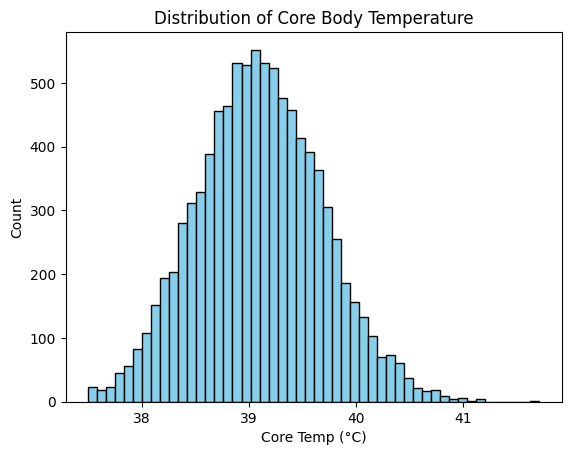

In [262]:
import numpy as np


def generate_cbt(df, rng=np.random.default_rng()):
    base = 38.5  # average resting CBT in °C
    
    # ----- Contextual Adjustments -----
    indoor_adjust = np.where(df["Indoor/Outdoor"] == "Outdoor_Now", 0.6, 0.0)
    season_adjust = np.select(
        [df["Season"] == "Winter", df["Season"] == "Summer"],
        [-0.2, 0.3],
        default=0.0
    )

    # ----- Environmental factors -----
    temp_adjust = 0.03 * (df["Ambient_Temp"] - 25)   # hotter environments raise CBT
    hum_adjust  = -0.01 * (df["Ambient_Humidity"] - 50)  # higher humidity slows cooling
    sun_adjust  = 0.0005 * df["Sun Exposure"]
    wind_adjust = 0.15 * df["Wind Cooling Effect"]   # negative if cooling effect is <0
    
    # ----- Coat effects -----
    coat_temp_offset = (
        map_val(df["Coat Length"], coat_len_temp)
        + map_val(df["Coat Type"], coat_type_temp)
    )
    coat_hum_offset = (
        map_val(df["Coat Length"], coat_len_hum)
        + map_val(df["Coat Type"], coat_type_hum)
    )
    
    # small random variation (~6%) 
    N = len(df)
    coat_temp_offset *= 1 + rng.normal(0, 0.06, N)
    coat_hum_offset  *= 1 + rng.normal(0, 0.06, N)

    # ----- Combine everything -----
    cbt_mean = (
        base
        + indoor_adjust
        + season_adjust
        + temp_adjust
        + hum_adjust
        + sun_adjust
        + wind_adjust
        + 0.15 * coat_temp_offset
        + 0.03 * coat_hum_offset
    )
    

        # --- Risk/vulnerability adjustments ---

    if {"Breed", "Age", "Weight"}.issubset(df.columns):
        age_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))
        wt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))
        
        age_diff = (df["Age"].fillna(df["Age"].median()) - df["Breed"].map(age_mu_map)).fillna(0)
        wt_diff  = (df["Weight"] / df["Breed"].map(wt_mu_map) - 1).fillna(0)
        
        # --- OPTION 1: Risk score based additive offset ---
        raw_risk = 0.05 * age_diff + 0.15 * wt_diff
        risk_score = (raw_risk - raw_risk.min()) / (raw_risk.max() - raw_risk.min() + 1e-9)
        
        additive_offset = 0.6 * risk_score   # tune 0.2..0.6
        # cbt_mean += additive_offset # deterministic
        cbt_mean += rng.normal(loc=additive_offset, scale=0.3) # stochastic
        

    # Add physiological noise
    cbt = rng.normal(cbt_mean, 0.35)  # ~0.35°C random variation

    # Clip to physiological range
    return np.clip(cbt, 37.5, 42.0)

# Apply to your dataframe
df["CBT_simulated"] = generate_cbt(df)


plt.hist(df["CBT_simulated"], bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Core Body Temperature")
plt.xlabel("Core Temp (°C)")
plt.ylabel("Count")
plt.show()

# can also add bracyphellic risk flag based on breed list once Manaswi finishes that mapping.

Above 39.4 is abnormal. Above 40 is indicative of heat exhaustion. 41 is heat stroke. 

In [263]:
#df = df.drop('CBT', axis=1)
#df = df.drop('Core_Temp', axis=1)

In [264]:
len(df[(df["CBT_simulated"] > 39.4) & (df["CBT_simulated"] < 40.0)]) # abnormal

2237

In [265]:
len(df[(df["CBT_simulated"] > 40.0) & (df["CBT_simulated"] < 41.0)]) # heat exhaustion, 0 actually experiencing heat stroke

588

In [266]:
# Adding other flags:
# isold flag (12+ years old)
df["is_old"] = (df["Age"] >= 12).astype(int)
df["is_overweight"] = (df["BCS"] >= 7).astype(int)
df["heat_stress_risk"] = ((df["is_old"] == 1) | (df["is_overweight"] == 1) | (df["is_brachycephalic"] == 1)).astype(int)
df["heat_stress_risk"].value_counts()

heat_stress_risk
0    4730
1    4636
Name: count, dtype: int64

In [267]:
df["is_overweight"].value_counts()
#df["is_brachycephalic"].value_counts()

# can sanity check against known percentages of overweight dogs

is_overweight
0    6551
1    2815
Name: count, dtype: int64

In [268]:
df["H_device"].value_counts(bins=10)

(53.624, 59.421]                3838
(47.827, 53.624]                2705
(59.421, 65.218]                1000
(94.203, 100.0]                  417
(76.812, 82.609]                 293
(82.609, 88.406]                 287
(88.406, 94.203]                 250
(71.015, 76.812]                 246
(65.218, 71.015]                 184
(41.971000000000004, 47.827]     146
Name: count, dtype: int64

In [269]:
df["High_humidity_fordogs"] = (df["H_device"] > 60).astype(int)
df["High_humidity_fordogs"].value_counts()

High_humidity_fordogs
0    6904
1    2462
Name: count, dtype: int64

In [270]:
# Binning humidity
df["Ambient_Humidity"].value_counts(bins=10)

(50.062, 57.196]                4621
(42.928, 50.062]                3085
(71.464, 78.598]                 385
(64.33, 71.464]                  367
(78.598, 85.732]                 291
(57.196, 64.33]                  259
(85.732, 92.866]                 196
(92.866, 100.0]                  141
(35.794, 42.928]                  17
(28.587999999999997, 35.794]       4
Name: count, dtype: int64

### Need prior heat related injury flag

In [271]:
df.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs'],
      dtype='object')

In [272]:
import numpy as np

def estimate_prior_HRI(row):
    risk = 0.002  # base prior risk (0.2%)
    
    # --- Breed contribution ---
    if row['is_brachycephalic'] == 1:
        risk += 0.04
    elif row['is_brachycephalic'] == 0:
        risk -= 0.01
    
    # --- Age group ---
    age = row['Age']
    if age == '3-6':
        risk += 0.01
    elif age == '7-10':
        risk += 0.02
    elif age == '10+':
        risk += 0.03

    bcs = row['BCS']
    if bcs <= 3:
        risk -= 0.01
    elif bcs >= 6 and bcs <= 7:
        risk += 0.02
    elif bcs >= 8:
        risk += 0.05


    # --- Neuter status ---
    if row['Spayed/Neutered'] == 1:
        risk += 0.01
    
    # Cap between 0 and 0.12 (12%)
    risk = np.clip(risk, 0, 0.12)
    return risk

df['prior_heat_related_injury_est'] = df.apply(estimate_prior_HRI, axis=1)
df['prior_heat_related_injury_est'].describe()

count    9366.000000
mean        0.023119
std         0.027086
min         0.000000
25%         0.000000
50%         0.012000
75%         0.042000
max         0.102000
Name: prior_heat_related_injury_est, dtype: float64

In [273]:
# Let's simulate a flag using this estimate by performing Bernoulli Sampling
# Modeled risk, since we dont have actual heat related illness incidence per population
df['simulated_heat_injury_flag'] = np.random.binomial(1, df['prior_heat_related_injury_est'])
df['simulated_heat_injury_flag'].value_counts()

simulated_heat_injury_flag
0    9158
1     208
Name: count, dtype: int64

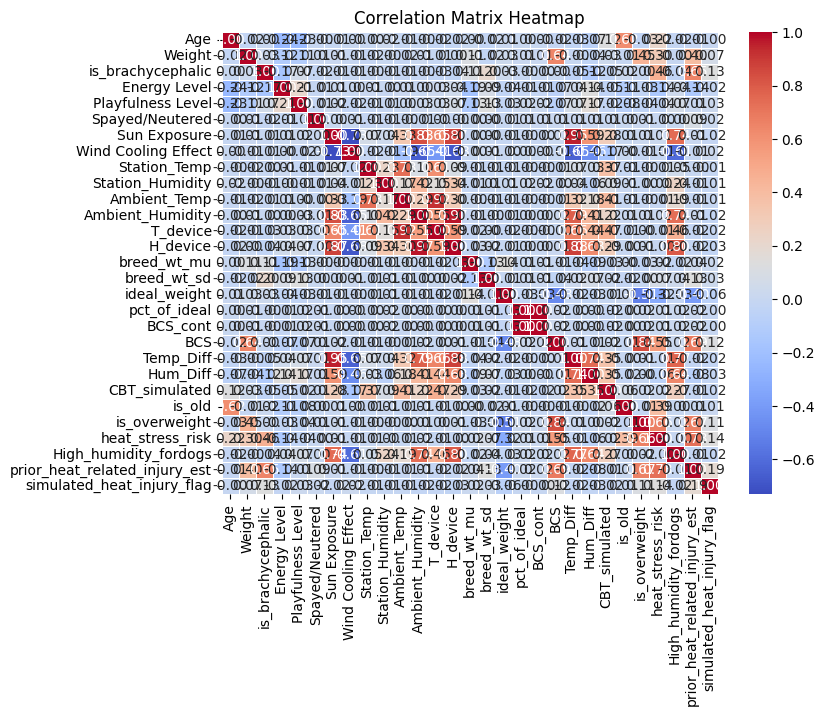

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Good sign that most features don't have strong multicolinearity with one another.

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X  = df.loc[:, df.columns != 'CBT_simulated']
y = df['CBT_simulated']
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# will look much better once adjust for multicolinearity, feature selection, and make into a classification problem 

#TODO: Features to add in: 
# also have the bracyphellic, acclimatization, and a few other factors (potentially risk flag/score - use CBT and old age?) to add in. 
# can we get a good relationship between skin temp and core temp? 
# New feature: how dog is moving at time to acknowledge that we will also be getting accelerometer reads. 

#TODO: Features to REDUCE noise in (aka group/bin): 
# need to decide on thresholds that will make this into a classification model. - all clear, at risk, danger...
# bin the humdidity thresholds too (based on how it makes dog be able to cool down/panting effectiveness)
# "old age" flag  
# "dark" and "light" categories based on coat color to test hypothesis.

#TODO: Features to ADD noise in: 
# energy level, right now directly mapped from breed - use age and random noise (this is a habitual feature, not current speed)
# playfulness level, right now directly mapped from breed - use age and random noise (this is a habitual feature, not current speed)

Mean Squared Error: 0.2234
R-squared: 0.3522


In [276]:
X_train.head()

Age  Weight  is_brachycephalic  Energy Level  Playfulness Level  \
4305   7.4    34.6                0.0      4.332548           3.496442   
1672  15.3    32.9                0.0      2.830071           2.959620   
8311   5.5    42.7                0.0      2.701513           3.365311   
8833   8.1    41.1                0.0      3.686936           4.250887   
8707   7.4    23.4                0.0      3.104482           3.214590   

      Spayed/Neutered  Sun Exposure  Wind Cooling Effect  Station_Temp  \
4305                1      0.000000             0.000000     15.375184   
1672                1      0.000000             0.000000     39.770686   
8311                1      0.000000             0.000000     29.124226   
8833                1      0.000000             0.000000     18.879376   
8707                0      2.239896            -0.664456     15.851479   

      Station_Humidity  ...  Coat Type_Wavy  Coat Type_Wiry  \
4305         71.230987  ...           False            True   
1672         75.474418  ...           False            True   
8311         64.350469  ...           False           False   
8833         75.476514  ...           False           False   
8707         64.772992  ...           False           False   

      size_category_Large  size_category_Medium  size_category_Small  \
4305                 True                 False                False   
1672                 True                 False                False   
8311                 True                 False                False   
8833                 True                 False                False   
8707                False                  True                False   

      size_category_Toy  Indoor/Outdoor_Outdoor_Now  Season_Spring  \
4305              False                       False          False   
1672              False                       False          False   
8311              False                       False          False   
8833              False                       False          False   
8707              False                        True          False   

      Season_Summer  Season_Winter  
4305          False           True  
1672          False          False  
8311          False          False  
8833          False          False  
8707          False           True  

[5 rows x 104 columns]

Reframing as a classification problem instead of predicting exact CBT - suits our use case more

Defining Target Variables

In [277]:
df["target2Category"] = np.where(df["CBT_simulated"] >= 39.8, 1, 0) # tried 39.4, want to capture less

conditions = [
    df['CBT_simulated'] < 39.8,
    (df['CBT_simulated'] >= 39.8) & (df['CBT_simulated'] < 40.7),
    df['CBT_simulated'] >= 40.7
]
choices = ['Normal', 'Heat Stress', 'Heat Stroke']
df["target3Category"] = np.select(conditions, choices, default='Unknown')
df["target3Category"].value_counts()

target3Category
Normal         8295
Heat Stress    1026
Heat Stroke      45
Name: count, dtype: int64

Train-Test Split

In [278]:
# can try tweaking this more.

# Drop both target columns from X
X = df.drop(columns=['target2Category', 'target3Category'])

# Separate targets
y2 = df['target2Category']   # 2-class
y3 = df['target3Category']   # 3-class

from sklearn.model_selection import train_test_split

# Split X and y2 (or y3) keep class proportions
X_train, X_test, y2_train, y2_test = train_test_split(
    X, y2, test_size=0.2, random_state=42, stratify=y2
)

y3_train = y3.loc[X_train.index]
y3_test = y3.loc[X_test.index]

# both targets are aligned with same X split.

""""
X  = df.loc[:, ~df.columns.isin(['CBT_simulated', 'isHeatStress'])]
X = pd.get_dummies(X, drop_first=True)

y = df['isHeatStress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# write to csv  
"""



'"\nX  = df.loc[:, ~df.columns.isin([\'CBT_simulated\', \'isHeatStress\'])]\nX = pd.get_dummies(X, drop_first=True)\n\ny = df[\'isHeatStress\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n# write to csv  \n'

In [279]:
df.to_csv("FullSimDF.csv", index=False)

### TODO: Try other binary classifiers

Can also make categorical instead of binary:
- No risk
- Some risk, heat exhaustion/stress (at least 39.4, maybe could raise a bit to capture less)
- High risk, heat stroke (at least 41, maybe could do 40.8)

Can also use SMOTE on 3 class.

### TODO: Use model-agnostic feature selection

In [ ]:
df["Indoor/Outdoor"].value_counts()

Indoor/Outdoor
Indoor_Now     742
Outdoor_Now    184
Name: count, dtype: int64

#### New Features
- ***Station Temp***: raw temp baseline reported by weather station
- ***Station Humidity***: raw humidity baseline reported by weather station
- ***Ambient Temp***: temp experienced in air near dog 
- ***Ambient Humidity***: humidity experienced in air near dog
- ***Temp_Diff***: effect of coat, activity level, environ on temp readings
- ***Hum_Diff***: effect of coat, activity level, environ on humidity readings
- ***T_device***: temp recorded by device
- ***H_device***: humidity recorded by device
- ***CBT***: true core body temp of dog
